<a href="https://shiroyasu.github.io/index.html">home</a> &#155;&#155; <a href="https://shiroyasu.github.io/teaching/index.html">Teaching</a> &#155;&#155; <a href="https://shiroyasu.github.io/teaching/nit.html">NIT</a> &#155;&#155; <a href="https://nbviewer.jupyter.org/github/shiroyasu/NIT2019-va/blob/master/2019S-VectorAnalysis.ipynb">2019 Vector Analysis</a>> &#155;&#155;

# ベクトル解析 <span style="color: #808080; ">Vector Analysis</span> #

## 積分公式（発散定理とストークスの定理） ##

In [2]:
JupyterImageResolution = 72;

### ベクトル場の発散の意味 ###

空間内の点$(x,y,z)$を適当に選び, 微小量 $\Delta x, \Delta y, \Delta z$ に対し, $(x\pm\Delta x, y\pm\Delta y, z\pm\Delta z)$ と表される８個の点を頂点とする直方体を考える.

この直方体の各面は $xy$平面, $yz$平面, $zx$平面に平行で, その面積は, それぞれ $4\Delta x\,\Delta y$, $4\Delta y\,\Delta z$, $4\Delta z\,\Delta x$ であり, 外向きの単位法線ベクトルは　$\pm\boldsymbol{k}$, $\pm\boldsymbol{i}$, $\pm\boldsymbol{j}$ である.


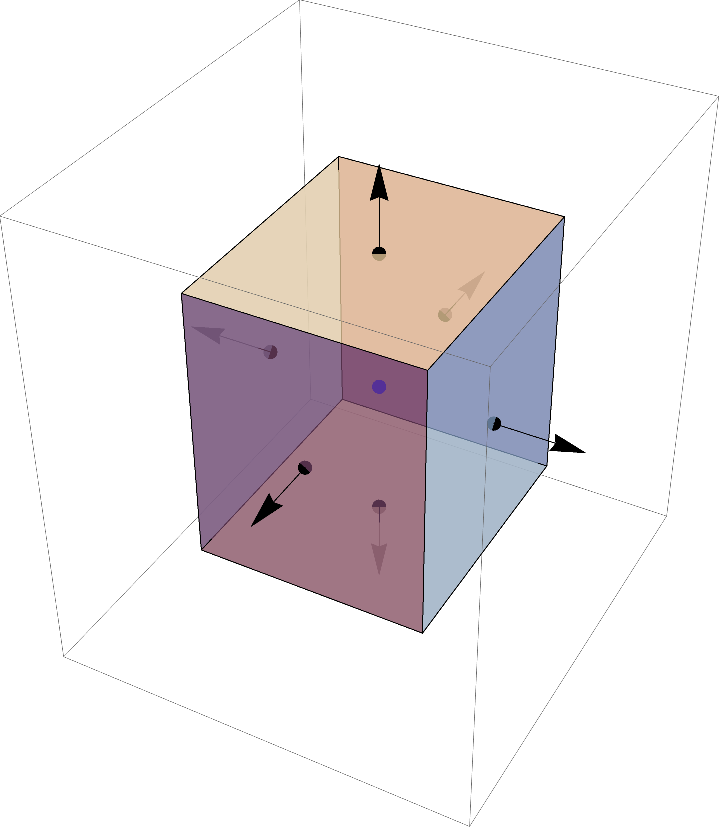

In [33]:
DeltaX:=1.3;DeltaY:=1.5;DeltaZ:=1.6;
Show[
    Graphics3D[{Opacity[0.7],Cuboid[{DeltaX,DeltaY,DeltaZ},{-DeltaX,-DeltaY,-DeltaZ}]}],
    Graphics3D[{Arrow[{{DeltaX,0,0},{DeltaX,0,0}+{1,0,0}}],Arrow[{{-DeltaX,0,0},{-DeltaX,0,0}+{-1,0,0}}],Arrow[{{0,DeltaY,0},{0,DeltaY,0}+{0,1,0}}],Arrow[{{0,-DeltaY,0},{0,-DeltaY,0}+{0,-1,0}}],Arrow[{{0,0,DeltaZ},{0,0,DeltaZ}+{0,0,1}}],,Arrow[{{0,0,-DeltaZ},{0,0,-DeltaZ}+{0,0,-1}}]}],
    Graphics3D[{PointSize[0.02],Point[{DeltaX,0,0}],Point[{-DeltaX,0,0}],Point[{0,DeltaY,0}],Point[{0,-DeltaY,0}],Point[{0,0,DeltaZ}],Point[{0,0,-DeltaZ}]}],
    Graphics3D[{PointSize[0.02],Blue,Point[{0,0,0}]}]
]

この直方体の表面を曲面$S$として, ベクトル場 $\boldsymbol{A}$ を$S$上で面積分する.
$S$は６つの面 $S_1, \ldots, S_6$ を張り合わせた曲面なので,
$$
\int_S \boldsymbol{A}\cdot d\boldsymbol{S}
=\int_S \boldsymbol{A}\cdot\boldsymbol{n}\,dS
=\sum_{m=1}^6\int_{S_m} \boldsymbol{A}\cdot\boldsymbol{n}\,dS_m
$$
と考えてよい.

$\Delta x, \Delta y, \Delta z$ はとても小さい値なので, 各面における面積分の値は,
$$
\boldsymbol{A}({\rm G}_m)\cdot \boldsymbol{n}\,\Delta S_m
$$
で近似する.
ここで, ${\rm G}_m$ は各面の重心で, $\Delta S_m$ は各面の面積である.

次の図の２つの面について, $\boldsymbol{A}({\rm G}_m)\cdot \boldsymbol{n}\,\Delta S_m$ を求めてみる.


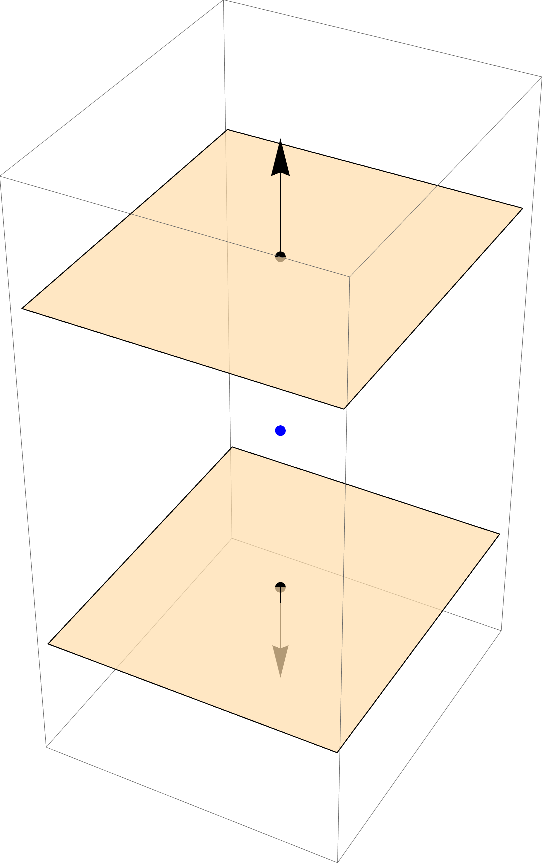

In [12]:
DeltaX:=1.3;DeltaY:=1.5;DeltaZ:=1.6;
Show[
    Graphics3D[{Opacity[0.7],Polygon[{{DeltaX,DeltaY,DeltaZ},{DeltaX,-DeltaY,DeltaZ},{-DeltaX,-DeltaY,DeltaZ},{-DeltaX,DeltaY,DeltaZ},{DeltaX,DeltaY,DeltaZ}}]}],
    Graphics3D[{Opacity[0.7],Polygon[{{DeltaX,DeltaY,-DeltaZ},{DeltaX,-DeltaY,-DeltaZ},{-DeltaX,-DeltaY,-DeltaZ},{-DeltaX,DeltaY,-DeltaZ},{DeltaX,DeltaY,-DeltaZ}}]}],
    Graphics3D[{Arrow[{{0,0,DeltaZ},{0,0,DeltaZ}+{0,0,1}}],Arrow[{{0,0,-DeltaZ},{0,0,-DeltaZ}+{0,0,-1}}]}],
    Graphics3D[{PointSize[0.02],Point[{0,0,DeltaZ}],Point[{0,0,-DeltaZ}]}],
    Graphics3D[{PointSize[0.02],Blue,Point[{0,0,0}]}]
]

上の面の中心（重心）$G_1$の座標は$(x, y, z+\Delta z)$なので,
\begin{align*}
\boldsymbol{A}(G_1)
=&\boldsymbol{A}(x, y, z+\Delta z)\\
=&\boldsymbol{A}(x, y, z+\Delta z)-\boldsymbol{A}(x, y, z)+\boldsymbol{A}(x, y, z)\\
=&\frac{\boldsymbol{A}(x, y, z+\Delta z)-\boldsymbol{A}(x, y, z)}{\Delta z}\,\Delta z+\boldsymbol{A}(x, y, z)\\
\approx&\frac{\partial \boldsymbol{A}}{\partial z}\,\Delta z+\boldsymbol{A}(x, y, z)
\end{align*}
となる.
下の面の中心（重心）$G_2)(x, y, z-\Delta z)$についても, 同様に,
$$
\boldsymbol{A}(G_2)=\boldsymbol{A}(x, y, z-\Delta z)\approx-\frac{\partial \boldsymbol{A}}{\partial z}\,\Delta z+\boldsymbol{A}(x, y, z)
$$
を得る.
これらのベクトルと, 対応するベクトル面素との内積をとる.

２つの面の面積がともに$\Delta S_1=\Delta S_2=4\Delta x\,\Delta y$であることと, 法線ベクトルがそれぞれ$\boldsymbol{k}, -\boldsymbol{k}$であることに注意すると,
\begin{align*}
\boldsymbol{A}({\rm G}_1)\cdot \boldsymbol{n}\,\Delta S_1+\boldsymbol{A}({\rm G}_2)\cdot \boldsymbol{n}\,\Delta S_2
\approx&4\Delta x\,\Delta y\left(\frac{\partial \boldsymbol{A}}{\partial z}\,\Delta z+\boldsymbol{A}(x, y, z)\right)\cdot\boldsymbol{k}\\
&+4\Delta x\,\Delta y\left(-\frac{\partial \boldsymbol{A}}{\partial z}\,\Delta z+\boldsymbol{A}(x, y, z)\right)\cdot(-\boldsymbol{k})\\
=&8\Delta x\,\Delta y\,\Delta z\,\frac{\partial \boldsymbol{A}}{\partial z}\cdot\boldsymbol{k}
\end{align*}

他の４つの面についても, 同様に考えることができ, 
$$
\int_S \boldsymbol{A}\cdot d\boldsymbol{S}
=\sum_{m=1}^6\boldsymbol{A}({\rm G}_m)\cdot \boldsymbol{n}\,\Delta S_m
=\left(\frac{\partial \boldsymbol{A}}{\partial x}\cdot\boldsymbol{i}+\frac{\partial \boldsymbol{A}}{\partial y}\cdot\boldsymbol{j}+\frac{\partial \boldsymbol{A}}{\partial z}\cdot\boldsymbol{k}\right)\,8\Delta x\,\Delta y\,\Delta z
=\mathrm{div}\boldsymbol{A}\,\Delta V
$$
ただし, $\Delta V=8\Delta x\,\Delta y\,\Delta z$ は直方体の体積である.

つまり, ベクトル場の発散は
$$
\mathrm{div}\boldsymbol{A}=\lim_{\Delta x,\Delta y,\Delta z\rightarrow 0}\frac{\int_S \boldsymbol{A}\cdot d\boldsymbol{S}}{\Delta V}
$$
を満たす.

#### ベクトル場の発散の意味 ####

ベクトル場を非圧縮流体が流れる速度を表すとすると,
右辺の分子は「微小粒子の表面を通過する（から湧き出る）流体」の単位時間あたりの<b>量</b>を表すので,
右辺は「微小粒子の表面を通過する（から湧き出る）流体」の単位時間あたりの<b>密度</b>と解釈できる.
これが, ベクトル場の発散の意味である.

### ガウスの発散定理 ###

ベクトル場$\boldsymbol{A}$の定義域内に領域$V$があり,
その表面（曲面）を$S$とするとき,
$$\int_V \mathrm{div}\boldsymbol{A}\,dxdydz=\int_S \boldsymbol{A}\cdot d\boldsymbol{S}$$
が成り立つ.
ただし, 左辺は空間の領域$V$を積分領域とする3重積分である.

#### 発散定理の証明の概略 ####

微小な直方体に関する上の議論は, 微小な四面体についても同様に成り立つ.
空間内の領域を微小な四面体の集まりに分割して多面体上で考察し, その極限をとる.

### ベクトル場の回転の意味 ###

空間内の点$(x,y,0)$を適当に選び, 微小量 $\Delta x, \Delta y$ に対し, $(x\pm\Delta x, y\pm\Delta y, 0)$ と表される4個の点を頂点とする長方形を考える.
この長方形の内部を曲面$S$として, 単位法線ベクトルを$\boldsymbol{k}$とする.
$S$の面積は$4\Delta x\,\Delta y$である.


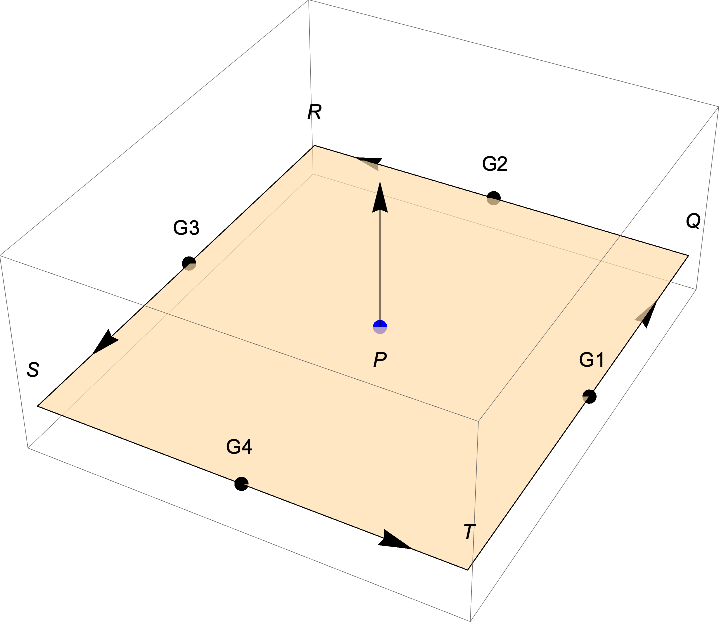

In [7]:
DeltaX:=1.3;DeltaY:=1.5;TextV:={0,0,1/4};
Show[
    Graphics3D[{Opacity[0.7],Polygon[{{DeltaX,DeltaY,0},{DeltaX,-DeltaY,0},{-DeltaX,-DeltaY,0},{-DeltaX,DeltaY,0},{DeltaX,DeltaY,0}}]}],
    Graphics3D[{PointSize[0.02],Point[{DeltaX,0,0}],Point[{-DeltaX,0,0}],Point[{0,DeltaY,0}],Point[{0,-DeltaY,0}],Blue,Point[{0,0,0}]}],
    Graphics3D[{Arrow[{{0,0,0},{0,0,0}+{0,0,1}}],Arrow[{{DeltaX,0,0},{DeltaX,0,0}+{0,1,0}}],Arrow[{{-DeltaX,0,0},{-DeltaX,0,0}+{0,-1,0}}],Arrow[{{0,DeltaY,0},{0,DeltaY,0}+{-1,0,0}}],Arrow[{{0,-DeltaY,0},{0,-DeltaY,0}+{1,0,0}}]}],
    Graphics3D[{Text[P,-TextV],Text[Q,{DeltaX,DeltaY,0}+TextV],Text[R,{-DeltaX,DeltaY,0}+TextV],Text[S,{-DeltaX,-DeltaY,0}+TextV],Text[T,{DeltaX,-DeltaY,0}+TextV],Text[G1,{DeltaX,0,0}+TextV],Text[G3,{-DeltaX,0,0}+TextV],Text[G2,{0,DeltaY,0}+TextV],Text[G4,{0,-DeltaY,0}+TextV]}]]

この長方形の縁を単一閉曲線$C$とし, $z$軸の正の方向からみて時計と反対周りの向きを入れる.
このとき, ベクトル場$\boldsymbol{A}$を$C$に沿って線積分する.
曲線$C$は4つの有向線分$\vec{\rm TQ}$, $\vec{\rm QR}$, $\vec{\rm RS}$, $\vec{\rm ST}$の和なので,
$$
\int_C\boldsymbol{A}\cdot d\boldsymbol{r}
=\int_\vec{\rm TQ}\boldsymbol{A}\cdot d\boldsymbol{r}+\int_\vec{\rm QR}\boldsymbol{A}\cdot d\boldsymbol{r}+\int_\vec{\rm RS}\boldsymbol{A}\cdot d\boldsymbol{r}+\int_\vec{\rm ST}\boldsymbol{A}\cdot d\boldsymbol{r}
$$
となる.
また, $\Delta x, \Delta y$は微小量なので, ４つの線積分の値は, 中点$G_m$におけるベクトル場との内積
$$
\int_C\boldsymbol{A}\cdot d\boldsymbol{r}
\approx
\boldsymbol{A}(G_1)\cdot \vec{\rm TQ}+\boldsymbol{A}(G_2)\cdot \vec{\rm QR}+\boldsymbol{A}(G_3)\cdot \vec{\rm RS}+\boldsymbol{A}(G_4)\cdot \vec{\rm ST}
$$
で近似して考える.

ここで,
$$
\boldsymbol{A}(G_1)=\boldsymbol{A}(x+\Delta x,y,0)=\frac{\boldsymbol{A}(x+\Delta x,y,0)-\boldsymbol{A}(x,y,0)}{\Delta x}\,\Delta x+\boldsymbol{A}(x,y,0)
\approx\frac{\partial \boldsymbol{A}}{\partial x}\Delta x+\boldsymbol{A}
$$
であり, $\vec{\rm TQ}=2\Delta y\,\boldsymbol{j}$なので,
$$
\boldsymbol{A}(G_1)\cdot \vec{\rm TQ}
\approx\frac{\partial \boldsymbol{A}}{\partial x}\cdot\boldsymbol{j}\,2\Delta x\Delta y+2\Delta y\boldsymbol{A}\cdot\boldsymbol{j}
$$
である.
同様に,
\begin{align*}
\boldsymbol{A}(G_3)\cdot \vec{\rm RS}
\approx&\frac{\partial \boldsymbol{A}}{\partial x}\cdot\boldsymbol{j}\,2\Delta x\Delta y-2\Delta y\boldsymbol{A}\cdot\boldsymbol{j}\\
\boldsymbol{A}(G_2)\cdot \vec{\rm QR}
\approx&-\frac{\partial \boldsymbol{A}}{\partial y}\cdot\boldsymbol{i}\,2\Delta x\Delta y-2\Delta x\boldsymbol{A}\cdot\boldsymbol{i}\\
\boldsymbol{A}(G_4)\cdot \vec{\rm ST}
\approx&-\frac{\partial \boldsymbol{A}}{\partial y}\cdot\boldsymbol{i}\,2\Delta x\Delta y+2\Delta x\boldsymbol{A}\cdot\boldsymbol{i}
\end{align*}
であるから, 近似式
$$
\int_C\boldsymbol{A}\cdot d\boldsymbol{r}
\approx\left(\frac{\partial \boldsymbol{A}}{\partial x}\cdot\boldsymbol{j}
-\frac{\partial \boldsymbol{A}}{\partial y}\cdot\boldsymbol{i}\right)\,4\Delta x\Delta y
=\mathrm{rot}\boldsymbol{A}\cdot\boldsymbol{k}\,\Delta S
$$
を得る.
ただし, $\Delta S=4\Delta x\Delta y$は長方形$S$の面積である.

一般に, ベクトル場の回転は
$$
\mathrm{rot}\boldsymbol{A}\cdot\boldsymbol{n}=\lim_{\Delta S\rightarrow 0}\frac{\int_C \boldsymbol{A}\cdot d\boldsymbol{r}}{\Delta S}
$$
を満たす.
ただし, $\Delta S$は曲面$S$の面積であり, $C$は$S$の境界である.

このことから, ベクトル場の回転は「渦の強さ」を表していると解釈できる.

ベクトル場が
- $C$の各点で接ベクトルと平行な（$S$の法線ベクトルと直交する）とき, 回転の大きさが大きい.
- $C$の各点で接ベクトルと直交する（$S$の法線ベクトルと平行な）とき, 回転の大きさは０に近い.

### ストークスの定理 ###

ベクトル場$\boldsymbol{A}$の定義域内に曲面$S$があり,
その境界線が単一閉曲線$C$であるとき,
$$
\int_S \mathrm{rot}\boldsymbol{A}\cdot\boldsymbol{n}\,dS
=\int_S \mathrm{rot}\boldsymbol{A}\cdot d\boldsymbol{S}
=\int_C \boldsymbol{A}\cdot d\boldsymbol{r}
$$
が成り立つ.
ただし, $\boldsymbol{n}$は曲面$S$の法線ベクトルで, $C$の向きは「$S$の法線ベクトル」と右ねじの関係になるような向きとする（「ベクトル場の回転の意味」を参照）.